In [1]:
### Задача 
#Определить самые загруженные часы в течении недели
import pandas as pd
workouts = pd.read_csv('workouts.csv')
workouts['hour'] =  workouts['start_at'].dt.hour
workouts['dayofweek'] = workouts['start_at'].dt.dayofweek

#Сгруппируем датасорс по часу и дню недели и посчитаем количество тренировок. 
workouts_hourday = workouts.groupby(['hour', 'dayofweek']).workout_id.count()
workouts_hourday = workouts_hourday.reset_index() 
workouts_hourday.head()


heat_weekdhour = workouts_hourday.pivot(index="dayofweek", 
                                        columns="hour", 
                                        values="workout_id")
heat_weekdhour.fillna(0, inplace=True)
heat_weekdhour 

heat_weekdhour.index = [
    'Понедельник',
    'Вторник',
    'Среда',
    'Четверг',
    'Пятница',
    'Суббота',
    'Воскресение']

plt.figure(figsize=(20,8))
sns.heatmap(heat_weekdhour, 
            annot=True, 
            cmap="YlGnBu", 
            fmt='g')
plt.title("Нагрузка по часам и дням недели")
plt.ylabel("День недели")
plt.xlabel("Час")
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

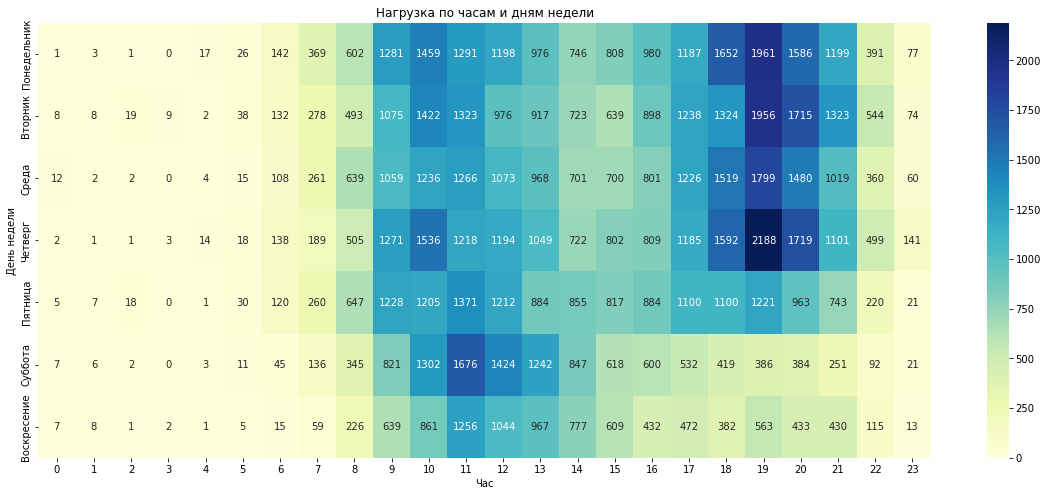

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


workouts = pd.read_csv('workouts.csv')
workouts['hour'] =  pd.to_datetime(workouts['start_at']).dt.hour
workouts['dayofweek'] = pd.to_datetime(workouts['start_at']).dt.dayofweek

#Сгруппируем датасорс по часу и дню недели и посчитаем количество тренировок. 
workouts_hourday = workouts.groupby(['hour', 'dayofweek']).workout_id.count()
workouts_hourday = workouts_hourday.reset_index() 

heat_weekdhour = workouts_hourday.pivot(index="dayofweek", 
                                        columns="hour", 
                                        values="workout_id")
heat_weekdhour.fillna(0, inplace=True)

heat_weekdhour.index = [
    'Понедельник',
    'Вторник',
    'Среда',
    'Четверг',
    'Пятница',
    'Суббота',
    'Воскресение']

plt.figure(figsize=(20,8))
sns.heatmap(heat_weekdhour, 
            annot=True, 
            cmap="YlGnBu", 
            fmt='g')
plt.title("Нагрузка по часам и дням недели")
plt.ylabel("День недели")
plt.xlabel("Час")
plt.show()